In [3]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [4]:
%matplotlib inline
%precision 2

'%.2f'

In [5]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")

In [7]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

X = train_df.iloc[:,1:]
y = train_df.label
label = sorted(y.unique())

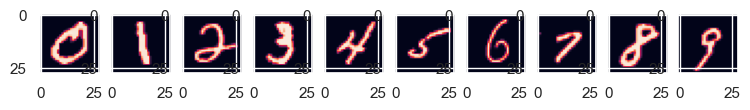

In [8]:
plt.figure(figsize=(9,9))
for i in label:
    plt.subplot(1,10, i+1)
    img = np.array( X[y==i][1:2] ).reshape(28,28)
    plt.imshow(img)


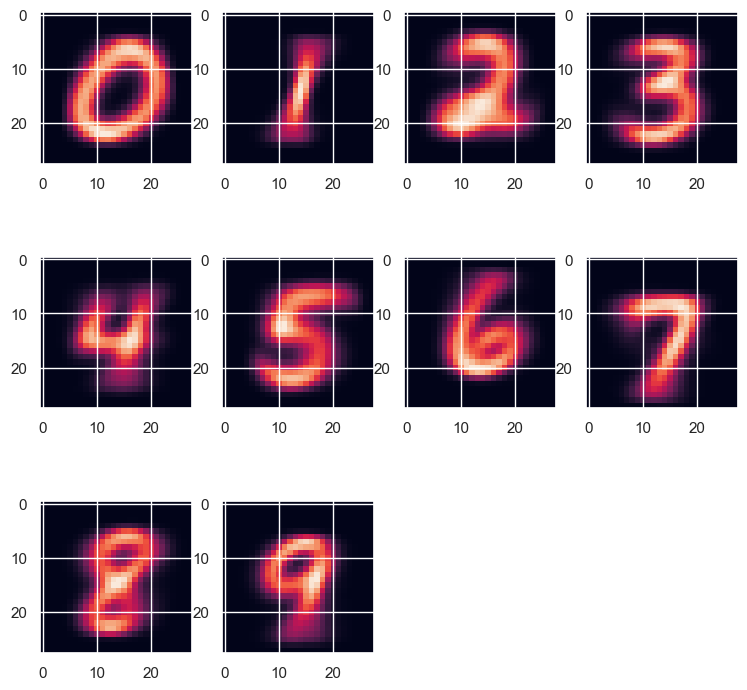

In [9]:
m = y.unique().shape[0]
n = X.shape[1]

mu = np.zeros((m,n))
si = np.zeros((m,n))
for i in label:
    mu[i] = X[y==i].mean()
    si[i] = X[y==i].std()
plt.figure(figsize=(9,9))
for i in label:
    plt.subplot(3,4, i+1)
    img = np.array( mu[i] ).reshape(28,28)
    plt.imshow(img)

Sum Axis-1 as Classification accuracy: 0.5587333333333333


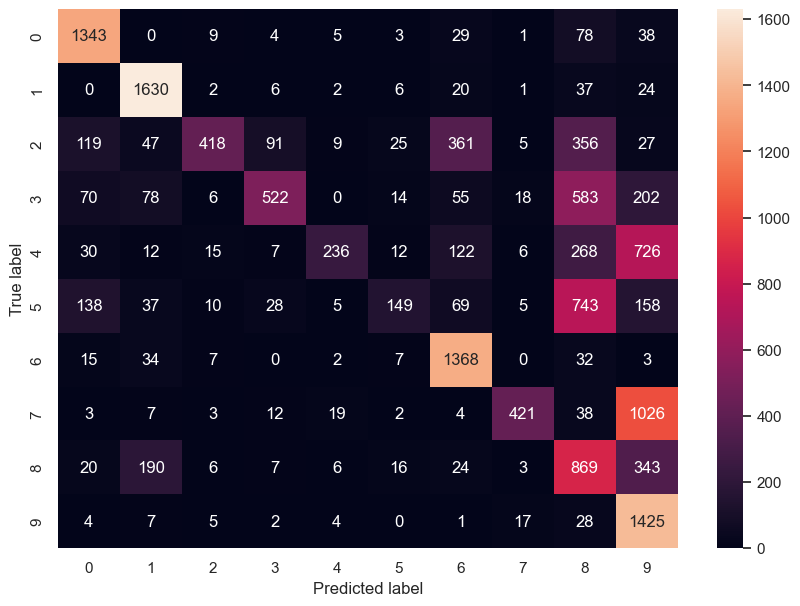

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
model = GaussianNB()

model.fit(X_train, y_train)
yhat = model.predict(X_valid)

draw_confusionmatrix(y_valid, yhat)